<a href="https://colab.research.google.com/github/AliSafdari99/nx_community/blob/master/Copy_of_Untitled_(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Community Detection Algorithms in Complex Networks**


In [1]:
!git clone https://github.com/AliSafdari99/nx_community.git
!sudo apt-get install python-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz


Cloning into 'nx_community'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 16 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugin

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
matplotlib.style.use("grayscale")

import pandas as pd
import numpy as np 

from itertools import count


In [3]:
attrs = {
    "edge_color" : "gray",
    "edgecolors" : "black",
    "linewidths" : 1,
    "font_size" : 14,
    "node_color" : "pink",
    "node_size" : 500,
    "width" : 2,
}

small_attrs = attrs.copy()
small_attrs["node_size"] = 50
small_attrs["font_size"] = 10

medium_attrs = small_attrs.copy()
medium_attrs["node_size"] = 250

huge_attrs = attrs.copy()
huge_attrs["node_size"] = 1000


**Community Detection Algorithms**

In [4]:
from networkx.algorithms.community import label_propagation_communities as lpc
# from networkx.algorithms.community import asyn_lpa_communities as lpc

from networkx.algorithms.community import greedy_modularity_communities as gmc

#networkx 2.8
# from networkx.algorithms.community import louvain_communities as lc
from nx_community.nx.louvain_communities import louvain_communities as lc

def set_node_community_att(G,communities,label):
  for count,community in enumerate(communities):
    for node in community:
      G.nodes[node][label]=count+1

def set_edge_community_att(G,label):
  internal=[]
  external=[]
  for v,w in G.edges:
    if G.nodes[v][label]==G.nodes[w][label]:
      G.edges[v,w][label]=G.nodes[v][label]
      internal.append((v,w))
    else:
      G.edges[v,w][label]=0
      external.append((v,w))
  return internal,external

import random

def get_colors(n):
  low,high=0.1,0.9
  span=high-low
  colors=[]
  for i in range(1,n+1):
    r=low+span*((i*3%(n+1))/n)
    g=low+span*((i*5%(n+1))/n)
    b=low+span*((i*7%(n+1))/n)
    colors.append((r,g,b))
  return random.sample(colors, len(colors))
  

**Polblogs Dataset**

Political blogosphere Feb. 2005
Data compiled by Lada Adamic and Natalie Glance

Node "value" attributes indicate political leaning according to:

  0 (left or liberal)
  1 (right or conservative)

Data on political leaning comes from blog directories as indicated.  Some
blogs were labeled manually, based on incoming and outgoing links and posts
around the time of the 2004 presidential election.  Directory-derived
labels are prone to error; manual labels even more so.

Links between blogs were automatically extracted from a crawl of the front
page of the blog.

These data should be cited as Lada A. Adamic and Natalie Glance, "The
political blogosphere and the 2004 US Election", in Proceedings of the
WWW-2005 Workshop on the Weblogging Ecosystem (2005).

In [5]:
polblogs=nx.DiGraph(nx.read_gml('/content/nx_community/polblogs/polblogs.gml',label='id'))
(len(polblogs.nodes),len(polblogs.edges))

(1490, 19025)

In [6]:
list(polblogs.nodes(data=True))[0]

(1, {'label': '100monkeystyping.com', 'value': 0, 'source': 'Blogarama'})

In [7]:
list(polblogs.edges(data=True))[0]

(1, 575, {})

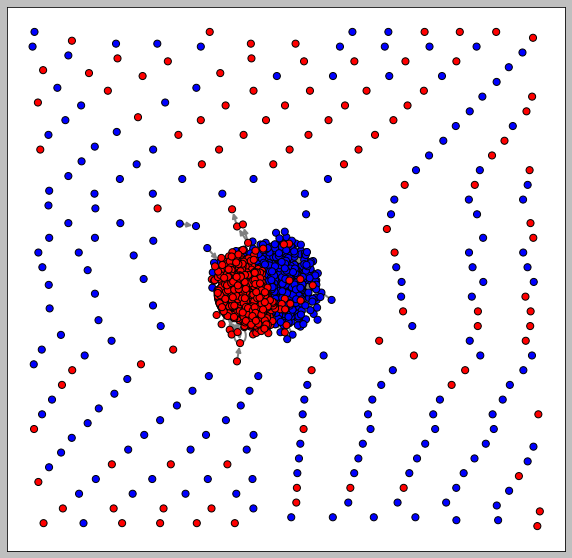

In [8]:

_,plot=plt.subplots()
pos=graphviz_layout(polblogs)

groups=set(nx.get_node_attributes(polblogs,'value').values())
mapping=dict(zip(sorted(groups),count()))
nodes=polblogs.nodes()
colors=[mapping[polblogs.nodes[node]['value']] for node in nodes]

import matplotlib.colors as mcol
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])

attrs=small_attrs.copy()
attrs['node_color']=colors
attrs['cmap']=cm1

nx.draw_networkx(polblogs,pos,**attrs,with_labels=False)

In [9]:
nx.number_of_isolates(polblogs)

266

In [10]:
polblogs_lpc=lpc(polblogs.to_undirected())
len(polblogs_lpc)

278

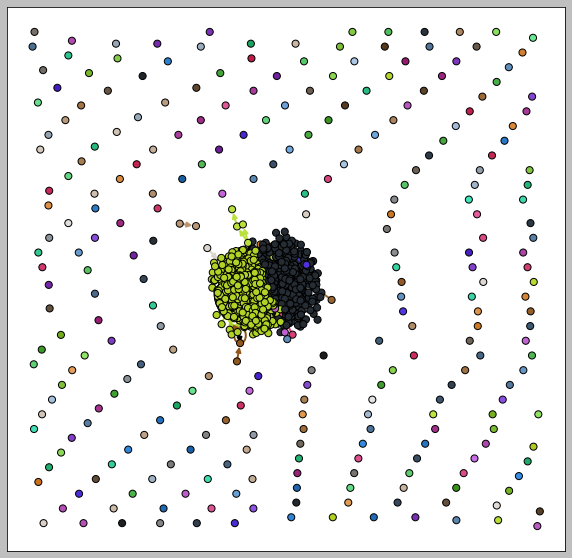

In [11]:
set_node_community_att(polblogs,polblogs_lpc,'LPC')

internal,external=set_edge_community_att(polblogs,'LPC')

_,plot=plt.subplots()
pos=graphviz_layout(polblogs)

colors=get_colors(len(polblogs_lpc))
attrs=small_attrs.copy()
attrs['node_color']=[colors[polblogs.nodes[node]['LPC']-1] for node in polblogs.nodes()]
attrs['edge_color']=[colors[polblogs.edges[edge]['LPC']-1] for edge in internal]

nx.draw_networkx(polblogs,pos,node_size=0,edgelist=external,with_labels=False,edge_color='#000000',width=2)
nx.draw_networkx(polblogs,pos,edgelist=internal,with_labels=False,**attrs)


In [12]:
polblogs_gmc=gmc(polblogs)
len(polblogs_gmc)

280

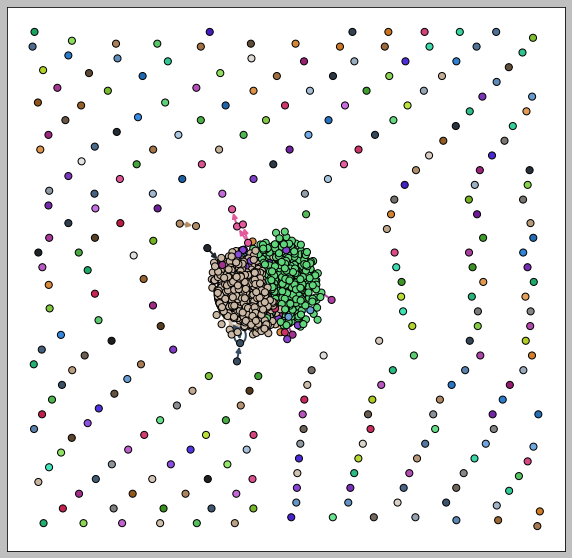

In [13]:
set_node_community_att(polblogs,polblogs_gmc,'GMC')

internal,external=set_edge_community_att(polblogs,'GMC')

_,plot=plt.subplots()
pos=graphviz_layout(polblogs)

colors=get_colors(len(polblogs_gmc))

attrs=small_attrs.copy()
attrs['node_color']=[colors[polblogs.nodes[node]['GMC']-1] for node in polblogs.nodes()]
attrs['edge_color']=[colors[polblogs.edges[edge]['GMC']-1] for edge in internal]

nx.draw_networkx(polblogs,pos,node_size=0,edgelist=external,with_labels=False,edge_color='#000000',width=2)
nx.draw_networkx(polblogs,pos,edgelist=internal,with_labels=False,**attrs)


In [14]:
polblogs_lc=lc(polblogs)
len(polblogs_lc)

301

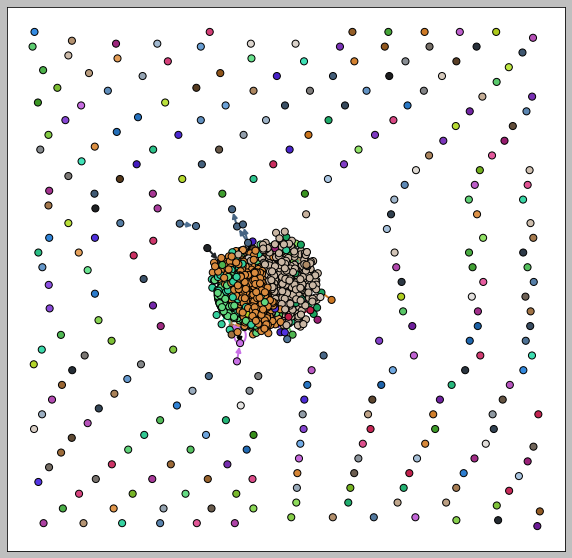

In [15]:
set_node_community_att(polblogs,polblogs_lc,'LC')

internal,external=set_edge_community_att(polblogs,'LC')


_,plot=plt.subplots()
pos=graphviz_layout(polblogs)

colors=get_colors(len(polblogs_lc))
attrs=small_attrs.copy()
attrs['node_color']=[colors[polblogs.nodes[node]['LC']-1] for node in polblogs.nodes()]
attrs['edge_color']=[colors[polblogs.edges[edge]['LC']-1] for edge in internal]

nx.draw_networkx(polblogs,pos,node_size=0,edgelist=external,with_labels=False,edge_color='#000000',width=2)
nx.draw_networkx(polblogs,pos,edgelist=internal,with_labels=False,**attrs)


In [16]:
polblogs_nodes_df=pd.DataFrame.from_dict(polblogs.nodes, orient='index')
polblogs_nodes_df['degree']=pd.Series(dict(nx.degree_centrality(polblogs)))
polblogs_nodes_df['in degree']=pd.Series(dict(nx.in_degree_centrality(polblogs)))
polblogs_nodes_df['out degree']=pd.Series(dict(nx.out_degree_centrality(polblogs)))
polblogs_nodes_df['inward closeness']=pd.Series(dict(nx.closeness_centrality(polblogs)))
polblogs_nodes_df['outward closeness']=pd.Series(dict(nx.closeness_centrality(polblogs.reverse())))
polblogs_nodes_df['betweenness']=pd.Series(dict(nx.betweenness_centrality(polblogs)))
polblogs_nodes_df


,label,value,source,LPC,GMC,LC,degree,in degree,out degree,inward closeness,outward closeness,betweenness
1,100monkeystyping.com,0,Blogarama,1,2,22,0.018133,0.008059,0.010074,0.208409,0.199700,0.000047
2,12thharmonic.com/wordpress,0,BlogCatalog,1,2,22,0.032236,0.003358,0.028878,0.170512,0.211149,0.000763
3,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog",2,15,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4lina.tblog.com,0,Blogarama,3,16,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,750volts.blogspot.com,0,Blogarama,1,12,3,0.002686,0.000672,0.002015,0.150152,0.164020,0.000466
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,youngconservative.blogspot.com,1,Blogarama,4,1,207,0.002015,0.001343,0.000672,0.203061,0.190544,0.000004
1487,zebrax.blogs.com,1,BlogCatalog,4,1,223,0.012760,0.002686,0.010074,0.175265,0.200678,0.000191
1488,zeke01.blogspot.com,1,"Blogarama,BlogCatalog",4,1,223,0.000672,0.000000,0.000672,0.000000,0.154477,0.000000
1489,zeke01.typepad.com,1,Blogarama,4,1,223,0.014775,0.009402,0.005373,0.213787,0.202862,0.000927


In [17]:
polblogs_edges_df=nx.to_pandas_edgelist(polblogs)
polblogs_edges_df['betweenness']=nx.edge_betweenness_centrality(polblogs).values()
polblogs_edges_df

,source,target,LC,LPC,GMC,betweenness
0,1,575,22,1,2,0.000051
1,1,1435,0,0,0,0.000104
2,1,644,22,1,2,0.000048
3,1,23,22,1,2,0.000013
4,1,1245,0,0,0,0.000056
...,...,...,...,...,...,...
19020,1489,963,0,4,1,0.000011
19021,1489,775,223,4,1,0.000180
19022,1489,1000,223,4,1,0.000250
19023,1489,1437,0,4,1,0.000067


In [18]:
polblogs__edges_betweenness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

# Label Propagation Community ->  internal edges centrality mean 

polblogs__edges_betweenness_mean['LPC']['internal']=polblogs_edges_df[polblogs_edges_df['LPC']>0]['betweenness'].mean()

# Label Propagation Community ->  external edges centrality mean 

polblogs__edges_betweenness_mean['LPC']['external']=polblogs_edges_df[polblogs_edges_df['LPC']==0]['betweenness'].mean()


# Greedy Modularity Community ->  internal edges centrality mean 

polblogs__edges_betweenness_mean['GMC']['internal']=polblogs_edges_df[polblogs_edges_df['GMC']>0]['betweenness'].mean()

# Greedy Modularity Community ->  external edges centrality mean 

polblogs__edges_betweenness_mean['GMC']['external']=polblogs_edges_df[polblogs_edges_df['GMC']==0]['betweenness'].mean()



# Louvain Community ->  internal edges centrality mean 

polblogs__edges_betweenness_mean['LC']['internal']=polblogs_edges_df[polblogs_edges_df['LC']>0]['betweenness'].mean()

# Louvain Community ->  external edges centrality mean 

polblogs__edges_betweenness_mean['LC']['external']=polblogs_edges_df[polblogs_edges_df['LC']==0]['betweenness'].mean()



In [19]:
polblogs__edges_betweenness_mean

{'LPC': {'internal': 7.071790858829418e-05,
  'external': 0.00018954818151368486},
 'GMC': {'internal': 7.035504619955719e-05,
  'external': 0.00018570091763828674},
 'LC': {'internal': 6.269357334674836e-05, 'external': 0.00016525779130049942}}

In [20]:
polblogs__nodes_inward_closeness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

polblogs__nodes_outward_closeness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

polblogs__nodes_betweenness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

In [21]:
# Label Propagation Community 

external_nodes_inward_closeness=[]
external_nodes_outward_closeness=[]
external_nodes_betweenness=[]
internal_nodes_inward_closeness=[]
internal_nodes_outward_closeness=[]
internal_nodes_betweenness=[]
for index,row in polblogs_edges_df.iterrows():
  if(row['LPC']==0):
    # external 
    external_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['source']])
    external_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['target']])
    external_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['source']])
    external_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['target']])
    external_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['source']])
    internal_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['target']])
    internal_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['source']])
    internal_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['target']])
    internal_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['target']])
 
polblogs__nodes_inward_closeness_mean['LPC']['external']=sum(external_nodes_inward_closeness)/len(external_nodes_inward_closeness)
polblogs__nodes_inward_closeness_mean['LPC']['internal']=sum(internal_nodes_inward_closeness)/len(internal_nodes_inward_closeness)

polblogs__nodes_outward_closeness_mean['LPC']['external']=sum(external_nodes_outward_closeness)/len(external_nodes_outward_closeness)
polblogs__nodes_outward_closeness_mean['LPC']['internal']=sum(internal_nodes_outward_closeness)/len(internal_nodes_outward_closeness)

polblogs__nodes_betweenness_mean['LPC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
polblogs__nodes_betweenness_mean['LPC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)


In [22]:
# Greedy Modularity Community 

external_nodes_inward_closeness=[]
external_nodes_outward_closeness=[]
external_nodes_betweenness=[]
internal_nodes_inward_closeness=[]
internal_nodes_outward_closeness=[]
internal_nodes_betweenness=[]
for index,row in polblogs_edges_df.iterrows():
  if(row['GMC']==0):
    # external 
    external_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['source']])
    external_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['target']])
    external_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['source']])
    external_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['target']])
    external_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['source']])
    internal_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['target']])
    internal_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['source']])
    internal_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['target']])
    internal_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['target']])
 
polblogs__nodes_inward_closeness_mean['GMC']['external']=sum(external_nodes_inward_closeness)/len(external_nodes_inward_closeness)
polblogs__nodes_inward_closeness_mean['GMC']['internal']=sum(internal_nodes_inward_closeness)/len(internal_nodes_inward_closeness)

polblogs__nodes_outward_closeness_mean['GMC']['external']=sum(external_nodes_outward_closeness)/len(external_nodes_outward_closeness)
polblogs__nodes_outward_closeness_mean['GMC']['internal']=sum(internal_nodes_outward_closeness)/len(internal_nodes_outward_closeness)

polblogs__nodes_betweenness_mean['GMC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
polblogs__nodes_betweenness_mean['GMC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)


In [23]:
# Louvain Community

external_nodes_inward_closeness=[]
external_nodes_outward_closeness=[]
external_nodes_betweenness=[]
internal_nodes_inward_closeness=[]
internal_nodes_outward_closeness=[]
internal_nodes_betweenness=[]
for index,row in polblogs_edges_df.iterrows():
  if(row['LC']==0):
    # external 
    external_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['source']])
    external_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['target']])
    external_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['source']])
    external_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['target']])
    external_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['source']])
    internal_nodes_inward_closeness.append(polblogs_nodes_df['inward closeness'][row['target']])
    internal_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['source']])
    internal_nodes_outward_closeness.append(polblogs_nodes_df['outward closeness'][row['target']])
    internal_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(polblogs_nodes_df['betweenness'][row['target']])
 
polblogs__nodes_inward_closeness_mean['LC']['external']=sum(external_nodes_inward_closeness)/len(external_nodes_inward_closeness)
polblogs__nodes_inward_closeness_mean['LC']['internal']=sum(internal_nodes_inward_closeness)/len(internal_nodes_inward_closeness)

polblogs__nodes_outward_closeness_mean['LC']['external']=sum(external_nodes_outward_closeness)/len(external_nodes_outward_closeness)
polblogs__nodes_outward_closeness_mean['LC']['internal']=sum(internal_nodes_outward_closeness)/len(internal_nodes_outward_closeness)

polblogs__nodes_betweenness_mean['LC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
polblogs__nodes_betweenness_mean['LC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)


In [24]:
polblogs__nodes_inward_closeness_mean

{'LPC': {'external': 0.24653592184438616, 'internal': 0.23730119852479925},
 'GMC': {'external': 0.2447937986847403, 'internal': 0.23738718968753728},
 'LC': {'external': 0.2347707045884852, 'internal': 0.2385194322816891}}

In [25]:
polblogs__nodes_outward_closeness_mean

{'LPC': {'external': 0.19812530809676912, 'internal': 0.2044988119836142},
 'GMC': {'external': 0.19597388243452504, 'internal': 0.20470483669624245},
 'LC': {'external': 0.20096130311619234, 'internal': 0.20464331404013641}}

In [26]:
polblogs__nodes_betweenness_mean

{'LPC': {'external': 0.004652163847658932, 'internal': 0.004890138927631553},
 'GMC': {'external': 0.004698521452631843, 'internal': 0.004887807145100626},
 'LC': {'external': 0.00896010125715486, 'internal': 0.0041119909345588585}}

**Football Dataset**

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic


In [27]:
football=nx.read_gml('/content/nx_community/football/football.gml',label='id')
(len(football.nodes),len(football.edges))

(115, 613)

In [28]:
list(football.nodes(data=True))[0]

(0, {'label': 'BrighamYoung', 'value': 7})

In [29]:
list(football.edges(data=True))[0]

(0, 1, {})

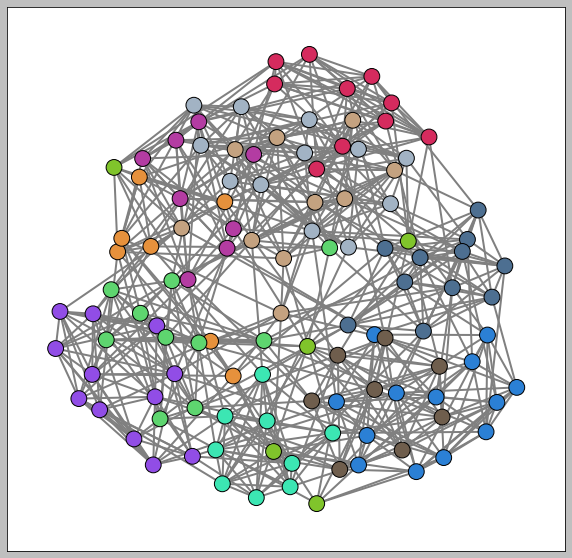

In [30]:

_,plot=plt.subplots()
pos=graphviz_layout(football)


groups=set(nx.get_node_attributes(football,'value').values())
mapping=dict(zip(sorted(groups),count()))
nodes=football.nodes()
colors=get_colors(len(groups))

attrs=medium_attrs.copy()
attrs['node_color']=[colors[mapping[football.nodes[node]['value']]] for node in nodes]

nx.draw_networkx(football,pos,with_labels=False,**attrs)

In [31]:
football_lpc=lpc(football)
len(football_lpc)

11

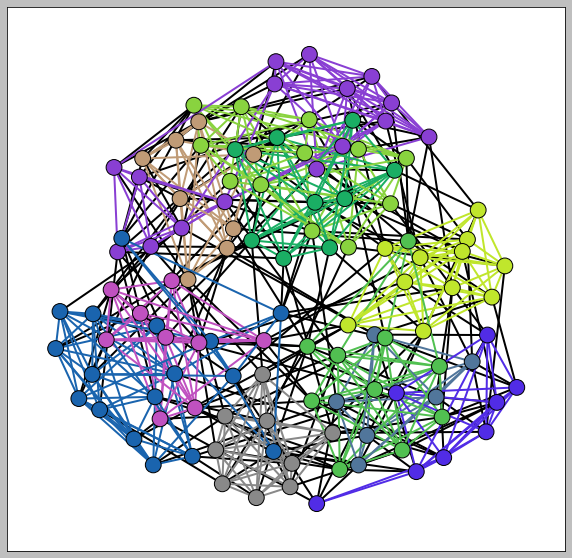

In [32]:
set_node_community_att(football,football_lpc,'LPC')

internal,external=set_edge_community_att(football,'LPC')

_,plot=plt.subplots()
pos=graphviz_layout(football)

colors=get_colors(len(football_lpc))
attrs=medium_attrs.copy()
attrs['node_color']=[colors[football.nodes[node]['LPC']-1] for node in football.nodes()]
attrs['edge_color']=[colors[football.edges[edge]['LPC']-1] for edge in internal]

nx.draw_networkx(football,pos,node_size=0,edgelist=external,with_labels=False,edge_color='#000000',width=2)
nx.draw_networkx(football,pos,edgelist=internal,with_labels=False,**attrs)


In [33]:
football_gmc=gmc(football)
len(football_gmc)

6

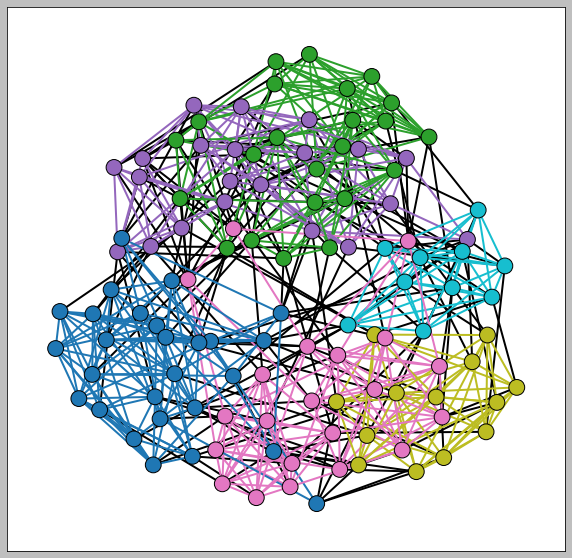

In [34]:
set_node_community_att(football,football_gmc,'GMC')

internal,external=set_edge_community_att(football,'GMC')


_,plot=plt.subplots()
pos=graphviz_layout(football)

attrs=medium_attrs.copy()
attrs['node_color']=[football.nodes[node]['GMC'] for node in football.nodes()]
attrs['edge_color']=[football.edges[edge]['GMC'] for edge in internal]
attrs['cmap']=plt.cm.tab10
attrs['edge_cmap']=plt.cm.tab10

nx.draw_networkx(football,pos,node_size=0,edgelist=external,with_labels=False,edge_color='#000000',width=2)
nx.draw_networkx(football,pos,edgelist=internal,with_labels=False,**attrs)


In [35]:
football_lc=lc(football)
len(football_lc)

10

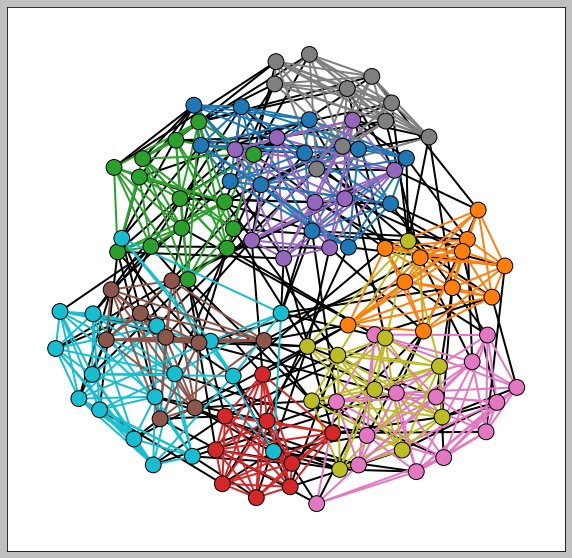

In [36]:
set_node_community_att(football,football_lc,'LC')

internal,external=set_edge_community_att(football,'LC')


_,plot=plt.subplots()
pos=graphviz_layout(football)

attrs=medium_attrs.copy()
attrs['node_color']=[football.nodes[node]['LC'] for node in football.nodes()]
attrs['edge_color']=[football.edges[edge]['LC'] for edge in internal]
attrs['cmap']=plt.cm.tab10
attrs['edge_cmap']=plt.cm.tab10

nx.draw_networkx(football,pos,node_size=0,edgelist=external,with_labels=False,edge_color='#000000',width=2)
nx.draw_networkx(football,pos,edgelist=internal,with_labels=False,**attrs)


In [37]:
football_nodes_df=pd.DataFrame.from_dict(football.nodes, orient='index')
football_nodes_df['degree']=pd.Series(dict(nx.degree_centrality(football)))
football_nodes_df['closeness']=pd.Series(dict(nx.closeness_centrality(football)))
football_nodes_df['betweenness']=pd.Series(dict(nx.betweenness_centrality(football)))
football_nodes_df

,label,value,LPC,GMC,LC,degree,closeness,betweenness
0,BrighamYoung,7,1,4,3,0.105263,0.423792,0.032490
1,FloridaState,0,2,4,4,0.105263,0.413043,0.017621
2,Iowa,2,3,3,2,0.105263,0.407143,0.013122
3,KansasState,3,4,3,1,0.105263,0.420664,0.023070
4,NewMexico,7,1,3,3,0.096491,0.402827,0.010664
...,...,...,...,...,...,...,...,...
110,TexasChristian,4,11,2,5,0.096491,0.413043,0.014370
111,California,8,5,2,8,0.096491,0.382550,0.007516
112,AlabamaBirmingham,4,10,1,6,0.087719,0.395833,0.011582
113,Arkansas,9,7,1,10,0.087719,0.377483,0.006498


In [38]:
football_edges_df=nx.to_pandas_edgelist(football)
football_edges_df['betweenness']=nx.edge_betweenness_centrality(football).values()

football_edges_df

,source,target,LC,LPC,GMC,betweenness
0,0,1,0,0,4,0.009593
1,0,4,3,1,0,0.004657
2,0,9,3,1,0,0.005901
3,0,16,3,1,0,0.004825
4,0,23,3,1,0,0.005542
...,...,...,...,...,...,...
608,103,109,4,2,4,0.002798
609,104,114,0,0,2,0.006103
610,105,109,4,2,4,0.001546
611,108,111,8,5,2,0.001132


In [39]:
football__edges_betweenness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

# Label Propagation Community ->  internal edges centrality mean 

football__edges_betweenness_mean['LPC']['internal']=football_edges_df[football_edges_df['LPC']>0]['betweenness'].mean()

# Label Propagation Community ->  external edges centrality mean 

football__edges_betweenness_mean['LPC']['external']=football_edges_df[football_edges_df['LPC']==0]['betweenness'].mean()


# Greedy Modularity Community ->  internal edges centrality mean 

football__edges_betweenness_mean['GMC']['internal']=football_edges_df[football_edges_df['GMC']>0]['betweenness'].mean()

# Greedy Modularity Community ->  external edges centrality mean 

football__edges_betweenness_mean['GMC']['external']=football_edges_df[football_edges_df['GMC']==0]['betweenness'].mean()



# Louvain Community ->  internal edges centrality mean 

football__edges_betweenness_mean['LC']['internal']=football_edges_df[football_edges_df['LC']>0]['betweenness'].mean()

# Louvain Community ->  external edges centrality mean 

football__edges_betweenness_mean['LC']['external']=football_edges_df[football_edges_df['LC']==0]['betweenness'].mean()



In [40]:
football__edges_betweenness_mean

{'LPC': {'internal': 0.00282579397186987, 'external': 0.0068050247609116364},
 'GMC': {'internal': 0.003105021319968914, 'external': 0.006770376710747281},
 'LC': {'internal': 0.0028284140390048944, 'external': 0.0071543576295600595}}

In [41]:
football__nodes_closeness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

football__nodes_betweenness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

In [42]:
# Label Propagation Community 

external_nodes_closeness=[]
external_nodes_betweenness=[]
internal_nodes_closeness=[]
internal_nodes_betweenness=[]
for index,row in football_edges_df.iterrows():
  if(row['LPC']==0):
    # external 
    external_nodes_closeness.append(football_nodes_df['closeness'][row['source']])
    external_nodes_closeness.append(football_nodes_df['closeness'][row['target']])
    external_nodes_betweenness.append(football_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(football_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_closeness.append(football_nodes_df['closeness'][row['source']])
    internal_nodes_closeness.append(football_nodes_df['closeness'][row['target']])
    internal_nodes_betweenness.append(football_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(football_nodes_df['betweenness'][row['target']])
    
football__nodes_closeness_mean['LPC']['external']=sum(external_nodes_closeness)/len(external_nodes_closeness)
football__nodes_closeness_mean['LPC']['internal']=sum(internal_nodes_closeness)/len(internal_nodes_closeness)

football__nodes_betweenness_mean['LPC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
football__nodes_betweenness_mean['LPC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)


In [43]:
# Greedy Modularity Community 

external_nodes_closeness=[]
external_nodes_betweenness=[]
internal_nodes_closeness=[]
internal_nodes_betweenness=[]
for index,row in football_edges_df.iterrows():
  if(row['GMC']==0):
    # external 
    external_nodes_closeness.append(football_nodes_df['closeness'][row['source']])
    external_nodes_closeness.append(football_nodes_df['closeness'][row['target']])
    external_nodes_betweenness.append(football_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(football_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_closeness.append(football_nodes_df['closeness'][row['source']])
    internal_nodes_closeness.append(football_nodes_df['closeness'][row['target']])
    internal_nodes_betweenness.append(football_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(football_nodes_df['betweenness'][row['target']])
    
football__nodes_closeness_mean['GMC']['external']=sum(external_nodes_closeness)/len(external_nodes_closeness)
football__nodes_closeness_mean['GMC']['internal']=sum(internal_nodes_closeness)/len(internal_nodes_closeness)

football__nodes_betweenness_mean['GMC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
football__nodes_betweenness_mean['GMC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)



In [44]:
# Louvain Community

external_nodes_closeness=[]
external_nodes_betweenness=[]
internal_nodes_closeness=[]
internal_nodes_betweenness=[]
for index,row in football_edges_df.iterrows():
  if(row['LC']==0):
    # external 
    external_nodes_closeness.append(football_nodes_df['closeness'][row['source']])
    external_nodes_closeness.append(football_nodes_df['closeness'][row['target']])
    external_nodes_betweenness.append(football_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(football_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_closeness.append(football_nodes_df['closeness'][row['source']])
    internal_nodes_closeness.append(football_nodes_df['closeness'][row['target']])
    internal_nodes_betweenness.append(football_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(football_nodes_df['betweenness'][row['target']])
    
football__nodes_closeness_mean['LC']['external']=sum(external_nodes_closeness)/len(external_nodes_closeness)
football__nodes_closeness_mean['LC']['internal']=sum(internal_nodes_closeness)/len(internal_nodes_closeness)

football__nodes_betweenness_mean['LC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
football__nodes_betweenness_mean['LC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)



In [45]:
football__nodes_closeness_mean

{'LPC': {'external': 0.4014884901092832, 'internal': 0.39886248458399953},
 'GMC': {'external': 0.4040777820358875, 'internal': 0.3980846877042427},
 'LC': {'external': 0.40218452244843306, 'internal': 0.3986722226017339}}

In [46]:
football__nodes_betweenness_mean

{'LPC': {'external': 0.014399927944949865, 'internal': 0.01305953633156043},
 'GMC': {'external': 0.014978158638513447, 'internal': 0.01293633026897938},
 'LC': {'external': 0.01450683633940324, 'internal': 0.013064858136185025}}

**Karate Dataset**

The file karate.gml contains the network of friendships between the 34
members of a karate club at a US university, as described by Wayne Zachary
in 1977.  If you use these data in your work, please cite W. W. Zachary, An
information flow model for conflict and fission in small groups, Journal of
Anthropological Research 33, 452-473 (1977).

In [47]:
karate=nx.read_gml('/content/nx_community/karate/karate.gml',label='id')
(len(karate.nodes),len(karate.edges))

(34, 78)

In [48]:
list(karate.nodes(data=True))[0]

(1, {})

In [49]:
list(karate.edges(data=True))[0]

(1, 2, {})

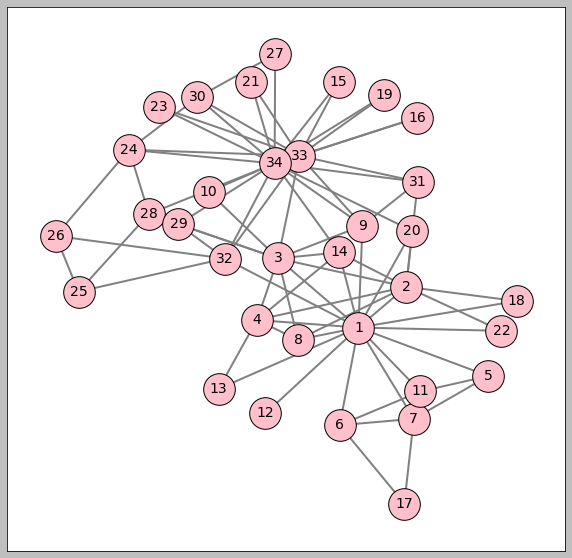

In [50]:

_,plot=plt.subplots()
pos=graphviz_layout(karate)

attrs=huge_attrs.copy()

nx.draw_networkx(karate,pos,**attrs)

In [51]:
karate_lpc=lpc(karate)
len(karate_lpc)

3

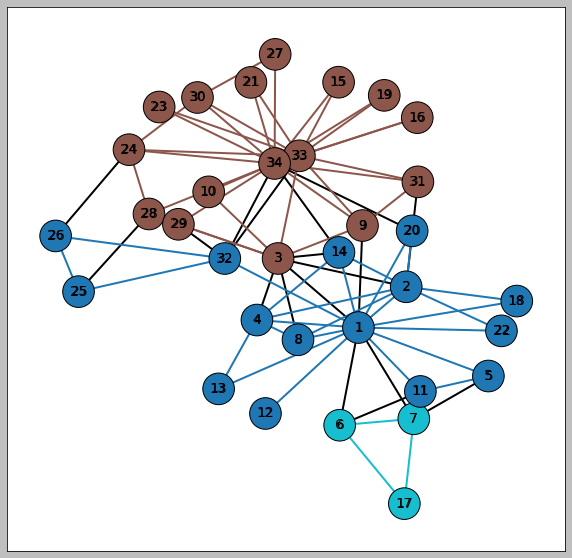

In [52]:
set_node_community_att(karate,karate_lpc,'LPC')

internal,external=set_edge_community_att(karate,'LPC')

_,plot=plt.subplots()
pos=graphviz_layout(karate)

attrs=huge_attrs.copy()
attrs['node_color']=[karate.nodes[node]['LPC'] for node in karate.nodes()]
attrs['edge_color']=[karate.edges[edge]['LPC'] for edge in internal]
attrs['cmap']=plt.cm.tab10
attrs['edge_cmap']=plt.cm.tab10

nx.draw_networkx(karate,pos,node_size=0,edgelist=external,edge_color='#000000',width=2)
nx.draw_networkx(karate,pos,edgelist=internal,**attrs)


In [53]:
karate_gmc=gmc(karate)
len(karate_gmc)

3

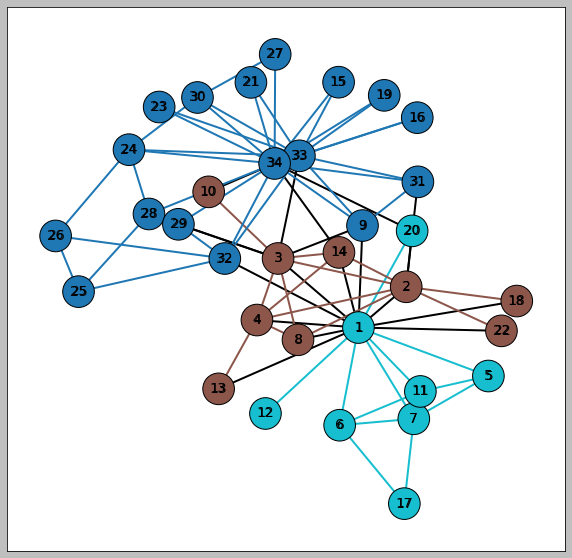

In [54]:
set_node_community_att(karate,karate_gmc,'GMC')

internal,external=set_edge_community_att(karate,'GMC')

_,plot=plt.subplots()
pos=graphviz_layout(karate)

attrs=huge_attrs.copy()
attrs['node_color']=[karate.nodes[node]['GMC'] for node in karate.nodes()]
attrs['edge_color']=[karate.edges[edge]['GMC'] for edge in internal]
attrs['cmap']=plt.cm.tab10
attrs['edge_cmap']=plt.cm.tab10

nx.draw_networkx(karate,pos,node_size=0,edgelist=external,edge_color='#000000',width=2)
nx.draw_networkx(karate,pos,edgelist=internal,**attrs)


In [55]:
karate_lc=lc(karate)
len(karate_lc)

4

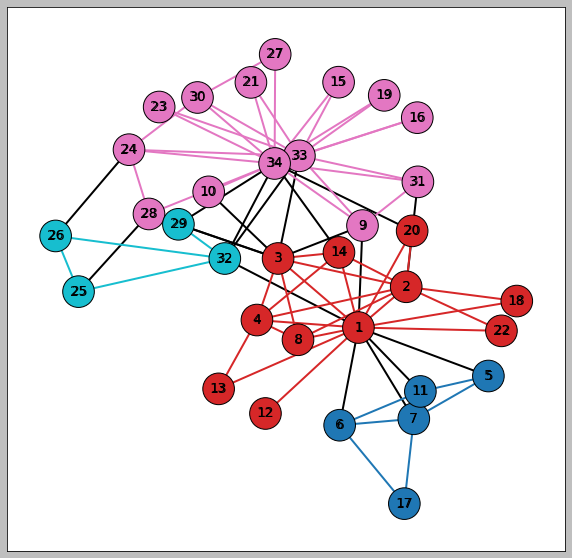

In [56]:
set_node_community_att(karate,karate_lc,'LC')

internal,external=set_edge_community_att(karate,'LC')


_,plot=plt.subplots()
pos=graphviz_layout(karate)

attrs=huge_attrs.copy()
attrs['node_color']=[karate.nodes[node]['LC'] for node in karate.nodes()]
attrs['edge_color']=[karate.edges[edge]['LC'] for edge in internal]
attrs['cmap']=plt.cm.tab10
attrs['edge_cmap']=plt.cm.tab10

nx.draw_networkx(karate,pos,node_size=0,edgelist=external,edge_color='#000000',width=2)
nx.draw_networkx(karate,pos,edgelist=internal,**attrs)


In [57]:
karate_nodes_df=pd.DataFrame.from_dict(karate.nodes, orient='index')
karate_nodes_df['degree']=pd.Series(dict(nx.degree_centrality(karate)))
karate_nodes_df['closeness']=pd.Series(dict(nx.closeness_centrality(karate)))
karate_nodes_df['betweenness']=pd.Series(dict(nx.betweenness_centrality(karate)))

karate_nodes_df

,LPC,GMC,LC,degree,closeness,betweenness
1,1,3,2,0.484848,0.568966,0.437635
2,1,2,2,0.272727,0.485294,0.053937
3,2,2,2,0.303030,0.559322,0.143657
4,1,2,2,0.181818,0.464789,0.011909
5,1,3,1,0.090909,0.379310,0.000631
6,3,3,1,0.121212,0.383721,0.029987
7,3,3,1,0.121212,0.383721,0.029987
8,1,2,2,0.121212,0.440000,0.000000
9,2,1,3,0.151515,0.515625,0.055927
10,2,2,3,0.060606,0.434211,0.000848


In [58]:
karate_edges_df=nx.to_pandas_edgelist(karate)
karate_edges_df['betweenness']=nx.edge_betweenness_centrality(karate).values()

karate_edges_df

,source,target,LC,LPC,GMC,betweenness
0,1,2,2,1,0,0.025253
1,1,3,2,0,0,0.077788
2,1,4,2,1,0,0.020499
3,1,5,0,1,3,0.052288
4,1,6,0,0,3,0.078134
...,...,...,...,...,...,...
73,31,33,3,2,1,0.017053
74,31,34,3,2,1,0.026814
75,32,33,0,0,1,0.041434
76,32,34,0,0,1,0.053394


In [59]:
karate__edges_betweenness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

# Label Propagation Community ->  internal edges centrality mean 

karate__edges_betweenness_mean['LPC']['internal']=karate_edges_df[karate_edges_df['LPC']>0]['betweenness'].mean()

# Label Propagation Community ->  external edges centrality mean 

karate__edges_betweenness_mean['LPC']['external']=karate_edges_df[karate_edges_df['LPC']==0]['betweenness'].mean()


# Greedy Modularity Community ->  internal edges centrality mean 

karate__edges_betweenness_mean['GMC']['internal']=karate_edges_df[karate_edges_df['GMC']>0]['betweenness'].mean()

# Greedy Modularity Community ->  external edges centrality mean 

karate__edges_betweenness_mean['GMC']['external']=karate_edges_df[karate_edges_df['GMC']==0]['betweenness'].mean()



# Louvain Community ->  internal edges centrality mean 

karate__edges_betweenness_mean['LC']['internal']=karate_edges_df[karate_edges_df['LC']>0]['betweenness'].mean()

# Louvain Community ->  external edges centrality mean 

karate__edges_betweenness_mean['LC']['external']=karate_edges_df[karate_edges_df['LC']==0]['betweenness'].mean()



In [60]:
karate__nodes_closeness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

karate__nodes_betweenness_mean={
    'LPC':{},
    'GMC':{},
    'LC':{},
}

In [61]:
# Label Propagation Community 

external_nodes_closeness=[]
external_nodes_betweenness=[]
internal_nodes_closeness=[]
internal_nodes_betweenness=[]
for index,row in karate_edges_df.iterrows():
  if(row['LPC']==0):
    # external 
    external_nodes_closeness.append(karate_nodes_df['closeness'][row['source']])
    external_nodes_closeness.append(karate_nodes_df['closeness'][row['target']])
    external_nodes_betweenness.append(karate_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(karate_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_closeness.append(karate_nodes_df['closeness'][row['source']])
    internal_nodes_closeness.append(karate_nodes_df['closeness'][row['target']])
    internal_nodes_betweenness.append(karate_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(karate_nodes_df['betweenness'][row['target']])
    
karate__nodes_closeness_mean['LPC']['external']=sum(external_nodes_closeness)/len(external_nodes_closeness)
karate__nodes_closeness_mean['LPC']['internal']=sum(internal_nodes_closeness)/len(internal_nodes_closeness)

karate__nodes_betweenness_mean['LPC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
karate__nodes_betweenness_mean['LPC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)


In [62]:
# Greedy Modularity Community 

external_nodes_closeness=[]
external_nodes_betweenness=[]
internal_nodes_closeness=[]
internal_nodes_betweenness=[]
for index,row in karate_edges_df.iterrows():
  if(row['GMC']==0):
    # external 
    external_nodes_closeness.append(karate_nodes_df['closeness'][row['source']])
    external_nodes_closeness.append(karate_nodes_df['closeness'][row['target']])
    external_nodes_betweenness.append(karate_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(karate_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_closeness.append(karate_nodes_df['closeness'][row['source']])
    internal_nodes_closeness.append(karate_nodes_df['closeness'][row['target']])
    internal_nodes_betweenness.append(karate_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(karate_nodes_df['betweenness'][row['target']])
    
karate__nodes_closeness_mean['GMC']['external']=sum(external_nodes_closeness)/len(external_nodes_closeness)
karate__nodes_closeness_mean['GMC']['internal']=sum(internal_nodes_closeness)/len(internal_nodes_closeness)

karate__nodes_betweenness_mean['GMC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
karate__nodes_betweenness_mean['GMC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)



In [63]:
# Louvain Community

external_nodes_closeness=[]
external_nodes_betweenness=[]
internal_nodes_closeness=[]
internal_nodes_betweenness=[]
for index,row in karate_edges_df.iterrows():
  if(row['LC']==0):
    # external 
    external_nodes_closeness.append(karate_nodes_df['closeness'][row['source']])
    external_nodes_closeness.append(karate_nodes_df['closeness'][row['target']])
    external_nodes_betweenness.append(karate_nodes_df['betweenness'][row['source']])
    external_nodes_betweenness.append(karate_nodes_df['betweenness'][row['target']])
  else:
     # internal 
    internal_nodes_closeness.append(karate_nodes_df['closeness'][row['source']])
    internal_nodes_closeness.append(karate_nodes_df['closeness'][row['target']])
    internal_nodes_betweenness.append(karate_nodes_df['betweenness'][row['source']])
    internal_nodes_betweenness.append(karate_nodes_df['betweenness'][row['target']])
    
karate__nodes_closeness_mean['LC']['external']=sum(external_nodes_closeness)/len(external_nodes_closeness)
karate__nodes_closeness_mean['LC']['internal']=sum(internal_nodes_closeness)/len(internal_nodes_closeness)

karate__nodes_betweenness_mean['LC']['external']=sum(external_nodes_betweenness)/len(external_nodes_betweenness)
karate__nodes_betweenness_mean['LC']['internal']=sum(internal_nodes_betweenness)/len(internal_nodes_betweenness)



In [64]:
karate__edges_betweenness_mean

{'LPC': {'internal': 0.028404776051834876, 'external': 0.03910628224353714},
 'GMC': {'internal': 0.026191914875863025, 'external': 0.0454145613588338},
 'LC': {'internal': 0.024671224421972178, 'external': 0.050136705399863285}}

In [65]:
karate__nodes_closeness_mean

{'LPC': {'external': 0.4885661955679839, 'internal': 0.4671726068938622},
 'GMC': {'external': 0.5142043036356625, 'internal': 0.45855366380979423},
 'LC': {'external': 0.4994477110156133, 'internal': 0.4633057868569287}}

In [66]:
karate__nodes_betweenness_mean

{'LPC': {'external': 0.12290142663406553, 'internal': 0.11195909992784996},
 'GMC': {'external': 0.17821111332624495, 'internal': 0.09396204274382242},
 'LC': {'external': 0.14890164964178126, 'internal': 0.10340068359136159}}

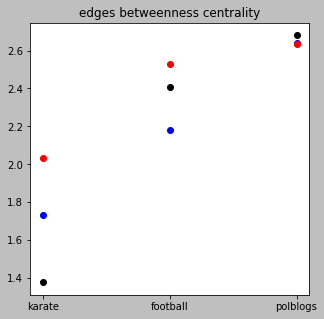

In [82]:
datasets=['karate','football','polblogs']
lpc_ratio = [karate__edges_betweenness_mean['LPC']['external']/karate__edges_betweenness_mean['LPC']['internal'],
     football__edges_betweenness_mean['LPC']['external']/football__edges_betweenness_mean['LPC']['internal'],
     polblogs__edges_betweenness_mean['LPC']['external']/polblogs__edges_betweenness_mean['LPC']['internal']
]
gmc_ratio = [karate__edges_betweenness_mean['GMC']['external']/karate__edges_betweenness_mean['GMC']['internal'],
     football__edges_betweenness_mean['GMC']['external']/football__edges_betweenness_mean['GMC']['internal'],
     polblogs__edges_betweenness_mean['GMC']['external']/polblogs__edges_betweenness_mean['GMC']['internal']
]
lc_ratio = [karate__edges_betweenness_mean['LC']['external']/karate__edges_betweenness_mean['LC']['internal'],
     football__edges_betweenness_mean['LC']['external']/football__edges_betweenness_mean['LC']['internal'],
     polblogs__edges_betweenness_mean['LC']['external']/polblogs__edges_betweenness_mean['LC']['internal']
]
fig = plt.figure(figsize=(5, 5))
plt.title('edges betweenness centrality') #title

plt.scatter(datasets, lpc_ratio,color='black')
plt.scatter(datasets, gmc_ratio,color='blue')
plt.scatter(datasets, lc_ratio,color='red')
plt.legend((lpc_plt,gmc_plt,lc_plt),
           ('LPC', 'GMC', 'LC'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()

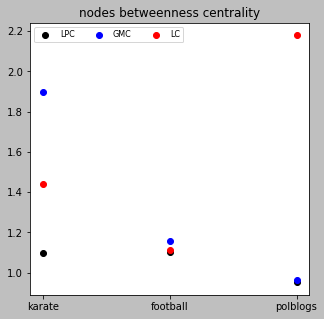

In [93]:
datasets=['karate','football','polblogs']
lpc_ratio = [karate__nodes_betweenness_mean['LPC']['external']/karate__nodes_betweenness_mean['LPC']['internal'],
     football__nodes_betweenness_mean['LPC']['external']/football__nodes_betweenness_mean['LPC']['internal'],
     polblogs__nodes_betweenness_mean['LPC']['external']/polblogs__nodes_betweenness_mean['LPC']['internal']
]
gmc_ratio = [karate__nodes_betweenness_mean['GMC']['external']/karate__nodes_betweenness_mean['GMC']['internal'],
     football__nodes_betweenness_mean['GMC']['external']/football__nodes_betweenness_mean['GMC']['internal'],
     polblogs__nodes_betweenness_mean['GMC']['external']/polblogs__nodes_betweenness_mean['GMC']['internal']
]
lc_ratio = [karate__nodes_betweenness_mean['LC']['external']/karate__nodes_betweenness_mean['LC']['internal'],
     football__nodes_betweenness_mean['LC']['external']/football__nodes_betweenness_mean['LC']['internal'],
     polblogs__nodes_betweenness_mean['LC']['external']/polblogs__nodes_betweenness_mean['LC']['internal']
]
fig = plt.figure(figsize=(5, 5))
plt.title('nodes betweenness centrality')

lpc_plt=plt.scatter(datasets, lpc_ratio,color='black')
gmc_plt=plt.scatter(datasets, gmc_ratio,color='blue')
lc_plt=plt.scatter(datasets, lc_ratio,color='red')
plt.legend((lpc_plt,gmc_plt,lc_plt),
           ('LPC', 'GMC', 'LC'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()

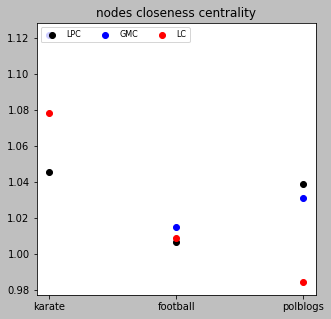

In [94]:
datasets=['karate','football','polblogs']
lpc_ratio = [karate__nodes_closeness_mean['LPC']['external']/karate__nodes_closeness_mean['LPC']['internal'],
     football__nodes_closeness_mean['LPC']['external']/football__nodes_closeness_mean['LPC']['internal'],
     polblogs__nodes_inward_closeness_mean['LPC']['external']/polblogs__nodes_inward_closeness_mean['LPC']['internal']
]
gmc_ratio = [karate__nodes_closeness_mean['GMC']['external']/karate__nodes_closeness_mean['GMC']['internal'],
     football__nodes_closeness_mean['GMC']['external']/football__nodes_closeness_mean['GMC']['internal'],
     polblogs__nodes_inward_closeness_mean['GMC']['external']/polblogs__nodes_inward_closeness_mean['GMC']['internal']
]
lc_ratio = [karate__nodes_closeness_mean['LC']['external']/karate__nodes_closeness_mean['LC']['internal'],
     football__nodes_closeness_mean['LC']['external']/football__nodes_closeness_mean['LC']['internal'],
     polblogs__nodes_inward_closeness_mean['LC']['external']/polblogs__nodes_inward_closeness_mean['LC']['internal']
]
fig = plt.figure(figsize=(5, 5))
plt.title('nodes closeness centrality')

lpc_plt=plt.scatter(datasets, lpc_ratio,color='black')
gmc_plt=plt.scatter(datasets, gmc_ratio,color='blue')
lc_plt=plt.scatter(datasets, lc_ratio,color='red')
plt.legend((lpc_plt,gmc_plt,lc_plt),
           ('LPC', 'GMC', 'LC'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()